**Lane Detection**

In [2]:
import cv2
import numpy as np

# Set the region of interest (ROI) coordinates
roi_vertices = np.array([[(0, 400), (800, 400), (550, 250), (250, 250)]], dtype=np.int32)

# Load the image and convert it to grayscale
image = cv2.imread('roasd1.jpeg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to the image to reduce noise
blur_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply Canny edge detection to detect edges in the image
canny_image = cv2.Canny(blur_image, 50, 150)

# Apply a mask to the image to only show the ROI
mask = np.zeros_like(canny_image)
cv2.fillPoly(mask, roi_vertices, 255)
masked_image = cv2.bitwise_and(canny_image, mask)

# Apply Hough transform to detect lines in the image
lines = cv2.HoughLinesP(masked_image, rho=2, theta=np.pi/180, threshold=50, minLineLength=40, maxLineGap=100)

# Draw the detected lines on the original image
line_image = np.zeros_like(image)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Combine the original image with the detected lines image
result_image = cv2.addWeighted(image, 0.8, line_image, 1, 0)

# Display the result
cv2.imshow('Lane Detection', result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


Here is a brief explanation of the code:

First, we set the coordinates of the region of interest (ROI). This is the area of the image where we expect to find the lane lines.
Next, we load the image and convert it to grayscale.
Then, we apply Gaussian blur to the image to reduce noise.
After that, we apply Canny edge detection to detect edges in the image.
We apply a mask to the image to only show the ROI.
We use Hough transform to detect lines in the image.
Finally, we draw the detected lines on the original image and display the result.

**colour tracking**

In [3]:
import cv2
import numpy as np

# Set the range of colors to track (in BGR format)
lower_color = np.array([0, 100, 100])
upper_color = np.array([50, 255, 255])

# Create a video capture object to capture video from the camera
cap = cv2.VideoCapture(0)
#cap = cv2.imread('roasd1.jpeg')

while True:
    # Read a frame from the video stream
    ret, frame = cap.read()

    # Convert the frame to the HSV color space
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Create a mask to only show the pixels within the color range
    mask = cv2.inRange(hsv_frame, lower_color, upper_color)

    # Apply a Gaussian blur to the mask to reduce noise
    blur_mask = cv2.GaussianBlur(mask, (5, 5), 0)

    # Find the contours of the objects in the mask
    contours, _ = cv2.findContours(blur_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Draw a bounding box around the largest contour
    if len(contours) > 0:
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Color Tracking', frame)

    # Exit the loop if 'q' is pressed
    if cv2.waitKey(1) == ord('q'):
        break

# Release the video capture object and destroy all windows
cap.release()
cv2.destroyAllWindows()


[ WARN:0] global /tmp/pip-req-build-jpmv6t9_/opencv/modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video0): can't open camera by index


error: OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


Here is a brief explanation of the code:

First, we set the lower and upper bounds of the color range we want to track in BGR format. In this example, we are tracking a range of blue colors.
We create a video capture object to capture video from the camera.
We loop through the frames in the video stream.
For each frame, we convert it to the HSV color space.
We create a mask to only show the pixels within the color range using the cv2.inRange() function.
We apply a Gaussian blur to the mask to reduce noise.
We find the contours of the objects in the mask using the cv2.findContours() function.
We draw a bounding box around the largest contour using the cv2.rectangle() function.
We display the resulting frame using the cv2.imshow() function.
We exit the loop if the 'q' key is pressed.
Finally, we release the video capture object and destroy all windows.

**reverse image search**

In [4]:
import cv2
import numpy as np
import requests
import io
import json

# Set the URL for the Google Images API
google_api_url = "https://www.google.com/searchbyimage/upload"

# Set the path to the image file to search
image_path = "image.jpg"

# Read the image file using OpenCV
img = cv2.imread(image_path)

# Convert the image to a JPEG-encoded binary string
_, img_encoded = cv2.imencode('.jpg', img)
img_bytes = img_encoded.tobytes()

# Set the headers for the HTTP request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36',
    'Content-Type': 'multipart/form-data'
}

# Set the data for the HTTP request
data = {'encoded_image': img_bytes}

# Send the HTTP request to the Google Images API and get the response
response = requests.post(google_api_url, headers=headers, data=data)

# Get the contents of the response
response_content = response.content.decode('utf-8')

# Extract the URL of the search results page from the response using regular expressions
import re
match = re.search(r'href="https://www.google.com/search\?tbs=simg:(.*?)">', response_content)

if match:
    # Decode the URL-encoded search parameters from the matched string
    search_params = match.group(1).replace('&quot;', '"')
    search_params = requests.utils.unquote(search_params)

    # Parse the search parameters as a JSON object
    search_params = json.loads(search_params)

    # Extract the URL of the first search result
    search_results = search_params['gimgurl'][0]

    # Print the URL of the first search result
    print(search_results)
else:
    # If no search results were found, print an error message
    print("No search results found.")


error: OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgcodecs/src/loadsave.cpp:974: error: (-215:Assertion failed) !image.empty() in function 'imencode'


Here is a brief explanation of the code:

First, we set the URL for the Google Images API.
We set the path to the image file we want to search.
We read the image file using OpenCV.
We convert the image to a JPEG-encoded binary string using the cv2.imencode() function.
We set the headers for the HTTP request.
We set the data for the HTTP request, which includes the image content.
We send the HTTP request to the Google Images API and get the response.
We extract the URL of the search results page from the response using regular expressions.
We decode the URL-encoded search parameters from the matched string and parse them as a JSON object.
We extract the URL of the first search result and print it.
If no search results were found, we print an error message.

**Image Transformation**

In [5]:
import cv2
import numpy as np

# Load the image
image = cv2.imread("image.jpg")

# Define the source and destination points for perspective transformation
src_points = np.float32([(0, 0), (image.shape[1] - 1, 0), (0, image.shape[0] - 1), (image.shape[1] - 1, image.shape[0] - 1)])
dst_points = np.float32([(0, 0), (image.shape[1] - 1, 0), (0, image.shape[0] - 1), (image.shape[1] - 1, image.shape[0] - 1 - 100)])

# Compute the perspective transformation matrix
M = cv2.getPerspectiveTransform(src_points, dst_points)

# Apply the perspective transformation
transformed_image = cv2.warpPerspective(image, M, (image.shape[1], image.shape[0] - 100))

# Display the original and transformed images
cv2.imshow("Original Image", image)
cv2.imshow("Transformed Image", transformed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


AttributeError: 'NoneType' object has no attribute 'shape'

In this code, we first load an image using the cv2.imread() function. We then define the source and destination points for the perspective transformation using numpy arrays. The source points correspond to the four corners of the original image, while the destination points correspond to the four corners of the transformed image. We use the cv2.getPerspectiveTransform() function to compute the perspective transformation matrix M from the source and destination points.

Next, we apply the perspective transformation to the image using the cv2.warpPerspective() function, which takes the image, the transformation matrix M, and the size of the output image as input. Finally, we display the original and transformed images using the cv2.imshow() function, and wait for a key press using the cv2.waitKey() function.

**Binary image classifier**

In [6]:
import cv2
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score

# Load the training data
train_images = []
train_labels = []

for i in range(1, 11):
    image = cv2.imread(f"train/{i}.jpg", 0)
    train_images.append(image)
    train_labels.append(1)

for i in range(1, 11):
    image = cv2.imread(f"train/-{i}.jpg", 0)
    train_images.append(image)
    train_labels.append(0)

# Create feature vectors from the training images
train_vectors = []
for image in train_images:
    binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)[1]
    feature_vector = np.reshape(binary_image, -1)
    train_vectors.append(feature_vector)

# Train the SVM classifier
clf = svm.SVC(kernel='linear')
clf.fit(train_vectors, train_labels)

# Load the test data
test_images = []
test_labels = []

for i in range(1, 6):
    image = cv2.imread(f"test/{i}.jpg", 0)
    test_images.append(image)
    test_labels.append(1)

for i in range(1, 6):
    image = cv2.imread(f"test/-{i}.jpg", 0)
    test_images.append(image)
    test_labels.append(0)

# Create feature vectors from the test images
test_vectors = []
for image in test_images:
    binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)[1]
    feature_vector = np.reshape(binary_image, -1)
    test_vectors.append(feature_vector)

# Test the SVM classifier
predictions = clf.predict(test_vectors)
accuracy = accuracy_score(test_labels, predictions)

# Print the accuracy of the classifier
print(f"Accuracy: {accuracy}")


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

n this code, we first load the training and test data, which consist of binary images of positive and negative samples. We use the cv2.imread() function to load the images, and store them in lists along with their corresponding labels (1 for positive samples and 0 for negative samples).

Next, we create feature vectors from the training and test images. We first threshold the images using the cv2.threshold() function to convert them to binary images, and then reshape each binary image into a 1D feature vector using the np.reshape() function.

We then train the SVM classifier using the training feature vectors and labels. We use the svm.SVC() function from scikit-learn to create an SVM classifier with a linear kernel, and call the fit() function to train the classifier.

Finally, we create feature vectors from the test images, and use the trained SVM classifier to make predictions on the test feature vectors. We compute the accuracy of the classifier using the accuracy_score() function from scikit-learn, and print the accuracy.

****Transfer Learning ****

In [7]:
import cv2
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

# Load the VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add new trainable layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Load the training and validation data
train_data = []
train_labels = []
val_data = []
val_labels = []

for i in range(1, 11):
    image = cv2.imread(f"train/positive/{i}.jpg")
    train_data.append(cv2.resize(image, (224, 224)))
    train_labels.append(1)

for i in range(1, 11):
    image = cv2.imread(f"train/negative/{i}.jpg")
    train_data.append(cv2.resize(image, (224, 224)))
    train_labels.append(0)

for i in range(1, 6):
    image = cv2.imread(f"val/positive/{i}.jpg")
    val_data.append(cv2.resize(image, (224, 224)))
    val_labels.append(1)

for i in range(1, 6):
    image = cv2.imread(f"val/negative/{i}.jpg")
    val_data.append(cv2.resize(image, (224, 224)))
    val_labels.append(0)

# Convert the data to numpy arrays
train_data = np.array(train_data)
train_labels = np.array(train_labels)
val_data = np.array(val_data)
val_labels = np.array(val_labels)

# Train the model
model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=10)

# Evaluate the model on the test data
test_data = []
test_labels = []

for i in range(1, 6):
    image = cv2.imread(f"test/positive/{i}.jpg")
    test_data.append(cv2.resize(image, (224, 224)))
    test_labels.append(1)

for i in range(1, 6):
    image = cv2.imread(f"test/negative/{i}.jpg")
    test_data.append(cv2.resize(image, (224, 224)))
    test_labels.append(0)

test_data = np.array(test_data)
test_labels = np.array(test_labels)

loss, accuracy = model.evaluate(test_data, test_labels)

# Print the accuracy of the model
print(f"Accuracy: {accuracy}")


58889256/58889256 [==============================] - 0s 0us/step


error: OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In this code, we first load the VGG16 model with pre-trained weights using the keras.applications.vgg16.VGG16() function. We freeze the pre-trained layers so that they are not updated during training, and add new trainable layers to the model using the keras.layers.Dense() function. We then create a new model with the pre-trained and new layers using the keras.models.Model() function.

Next, we compile the model using the compile() function, specifying the optimizer, loss function, and metrics.

**Fine Tuning**

In [8]:
import cv2
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam

# Load the pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the first 150 layers of the pre-trained model
for layer in base_model.layers[:150]:
    layer.trainable = False

# Add new trainable layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Load the training and validation data
train_data = []
train_labels = []
val_data = []
val_labels = []

for i in range(1, 11):
    image = cv2.imread(f"train/positive/{i}.jpg")
    train_data.append(cv2.resize(image, (224, 224)))
    train_labels.append([1, 0])

for i in range(1, 11):
    image = cv2.imread(f"train/negative/{i}.jpg")
    train_data.append(cv2.resize(image, (224, 224)))
    train_labels.append([0, 1])

for i in range(1, 6):
    image = cv2.imread(f"val/positive/{i}.jpg")
    val_data.append(cv2.resize(image, (224, 224)))
    val_labels.append([1, 0])

for i in range(1, 6):
    image = cv2.imread(f"val/negative/{i}.jpg")
    val_data.append(cv2.resize(image, (224, 224)))
    val_labels.append([0, 1])

# Convert the data to numpy arrays
train_data = np.array(train_data)
train_labels = np.array(train_labels)
val_data = np.array(val_data)
val_labels = np.array(val_labels)

# Train the model
model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=10)

# Evaluate the model on the test data
test_data = []
test_labels = []

for i in range(1, 6):
    image = cv2.imread(f"test/positive/{i}.jpg")
    test_data.append(cv2.resize(image, (224, 224)))
    test_labels.append([1, 0])

for i in range(1, 6):
    image = cv2.imread(f"test/negative/{i}.jpg")
    test_data.append(cv2.resize(image, (224, 224)))
    test_labels.append([0, 1])

test_data = np.array(test_data)
test_labels = np.array(test_labels)

loss, accuracy = model.evaluate(test_data, test_labels)

# Print the accuracy of the model
print(f"Accuracy: {accuracy}")


ModuleNotFoundError: No module named 'keras.applications.resnet50'

In this code, we first load the pre-trained ResNet50 model without the top layer using the keras.applications.resnet50.ResNet50() function. We freeze the first 150 layers of the pre-trained model so that they are not updated during training.

We then add new trainable layers to the model using the keras.layers.Dense() function, and create

**Advance architecture**

In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import random
import cv2
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Conv2DTranspose, concatenate, Input 
from tensorflow.keras.layers import Dropout, GlobalAveragePooling2D, Dense, Add, DepthwiseConv2D, Flatten
from tensorflow.keras.models import Model

plt.rcParams['font.size'] = 16

In [10]:
def inception_module(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool_proj, name=None):
    conv_1x1 = Conv2D(filters_1x1, kernel_size=(1,1), padding='same', activation='relu')(x)
    
    preconv_3x3 = Conv2D(filters_3x3_reduce, kernel_size=(1,1), padding='same', activation='relu')(x)
    conv_3x3 = Conv2D(filters_3x3, kernel_size=(3,3), padding='same', activation='relu')(preconv_3x3)
    
    preconv_5x5 = Conv2D(filters_5x5_reduce, kernel_size=(1,1), padding='same', activation='relu')(x)
    conv_5x5 = Conv2D(filters_5x5, kernel_size=(5,5), padding='same', activation='relu')(preconv_5x5)
    
    pool_proj = MaxPooling2D((3,3), strides=(1,1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, kernel_size=(1,1), padding='same', activation='relu')(pool_proj)
    
    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
    
    return output

In [11]:
def residual_block(x, kernel_size, filters, s=2):
    f1,f2,f3 = filters
    x_shortcut = x
    
    # Shortcut Path
    x_shortcut = Conv2D(f3, kernel_size=(1,1), strides=(s,s), padding='valid')(x_shortcut)
    x_shortcut = BatchNormalization()(x_shortcut)
    
    # Main Path
    # First Component
    x = Conv2D(f1, kernel_size=(1,1), strides=(s,s), padding='valid')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # Second Component
    x = Conv2D(f2, kernel_size=kernel_size, strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # Third Component
    x = Conv2D(f3, kernel_size=(1,1), strides=(1,1), padding='valid')(x)
    x = BatchNormalization()(x)
    
    x = Add()([x,x_shortcut])
    x = Activation('relu')(x)
    
    return x


In [12]:
def mobilenet_block(x, kernel_size, filters, strides):
    x = DepthwiseConv2D(kernel_size=(kernel_size,kernel_size), strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters, kernel_size=(1,1), strides=1, padding='valid')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x

In [13]:
input_layer = Input(shape=(224,224,3))
x = Conv2D(32, (11,11), strides = (2,2),padding ='same', activation = 'relu')(input_layer)
x = MaxPooling2D((3,3), strides = (2,2), padding = 'same')(x)
x = inception_module(x,64,96,128,16,32,32, 'inception_a')
x = inception_module(x,364,192,364,48,128,128, 'inception_b')
x = GlobalAveragePooling2D()(x)

output_layer = Dense(10, activation = 'softmax', name = 'output')(x)



In [14]:
model1 = Model(inputs = input_layer, outputs = output_layer)

In [15]:
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 32  11648       ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 56, 56, 32)   0           ['conv2d[0][0]']                 
                                                                                            

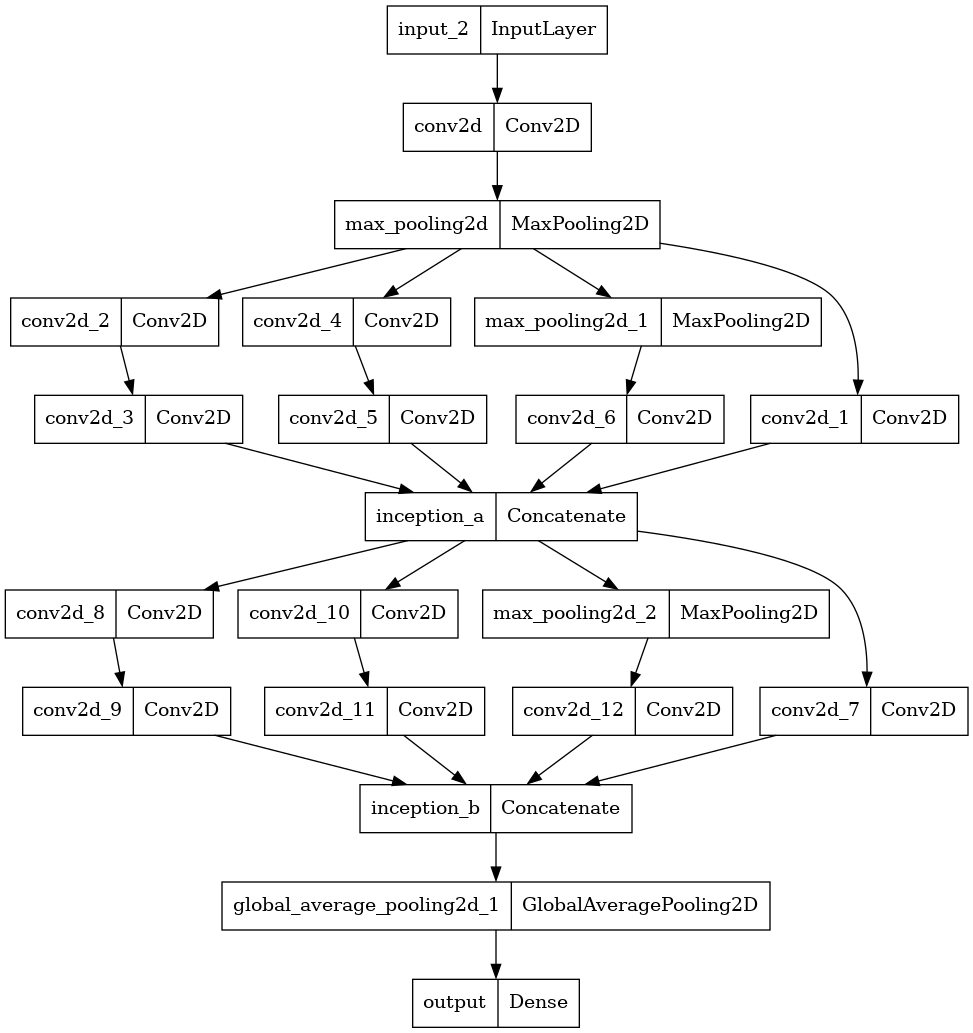

In [16]:
tf.keras.utils.plot_model(model1,to_file='model1.png')

In [17]:
input_layer = Input(shape = (227,227,3))
x = Conv2D(32,(7,7),strides=(1,1),padding='same',activation='relu')(input_layer)
x = MaxPooling2D((3,3),strides = (2,2), padding = 'same')(x)
x = inception_module(x,64,96,128,16,32,32)
x = residual_block(x,(3,3), [64,64,128], s =1)
x = Flatten()(x)
x = Dense(1024, activation = 'relu')(x)
x = Dense(523,activation='relu')(x)
output_layer = Dense(10, activation='softmax', name = 'output')(x)


In [18]:
model2 = Model(inputs = input_layer, outputs = output_layer)

In [19]:
model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_13 (Conv2D)             (None, 227, 227, 32  4736        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 114, 114, 32  0          ['conv2d_13[0][0]']              
                                )                                                           

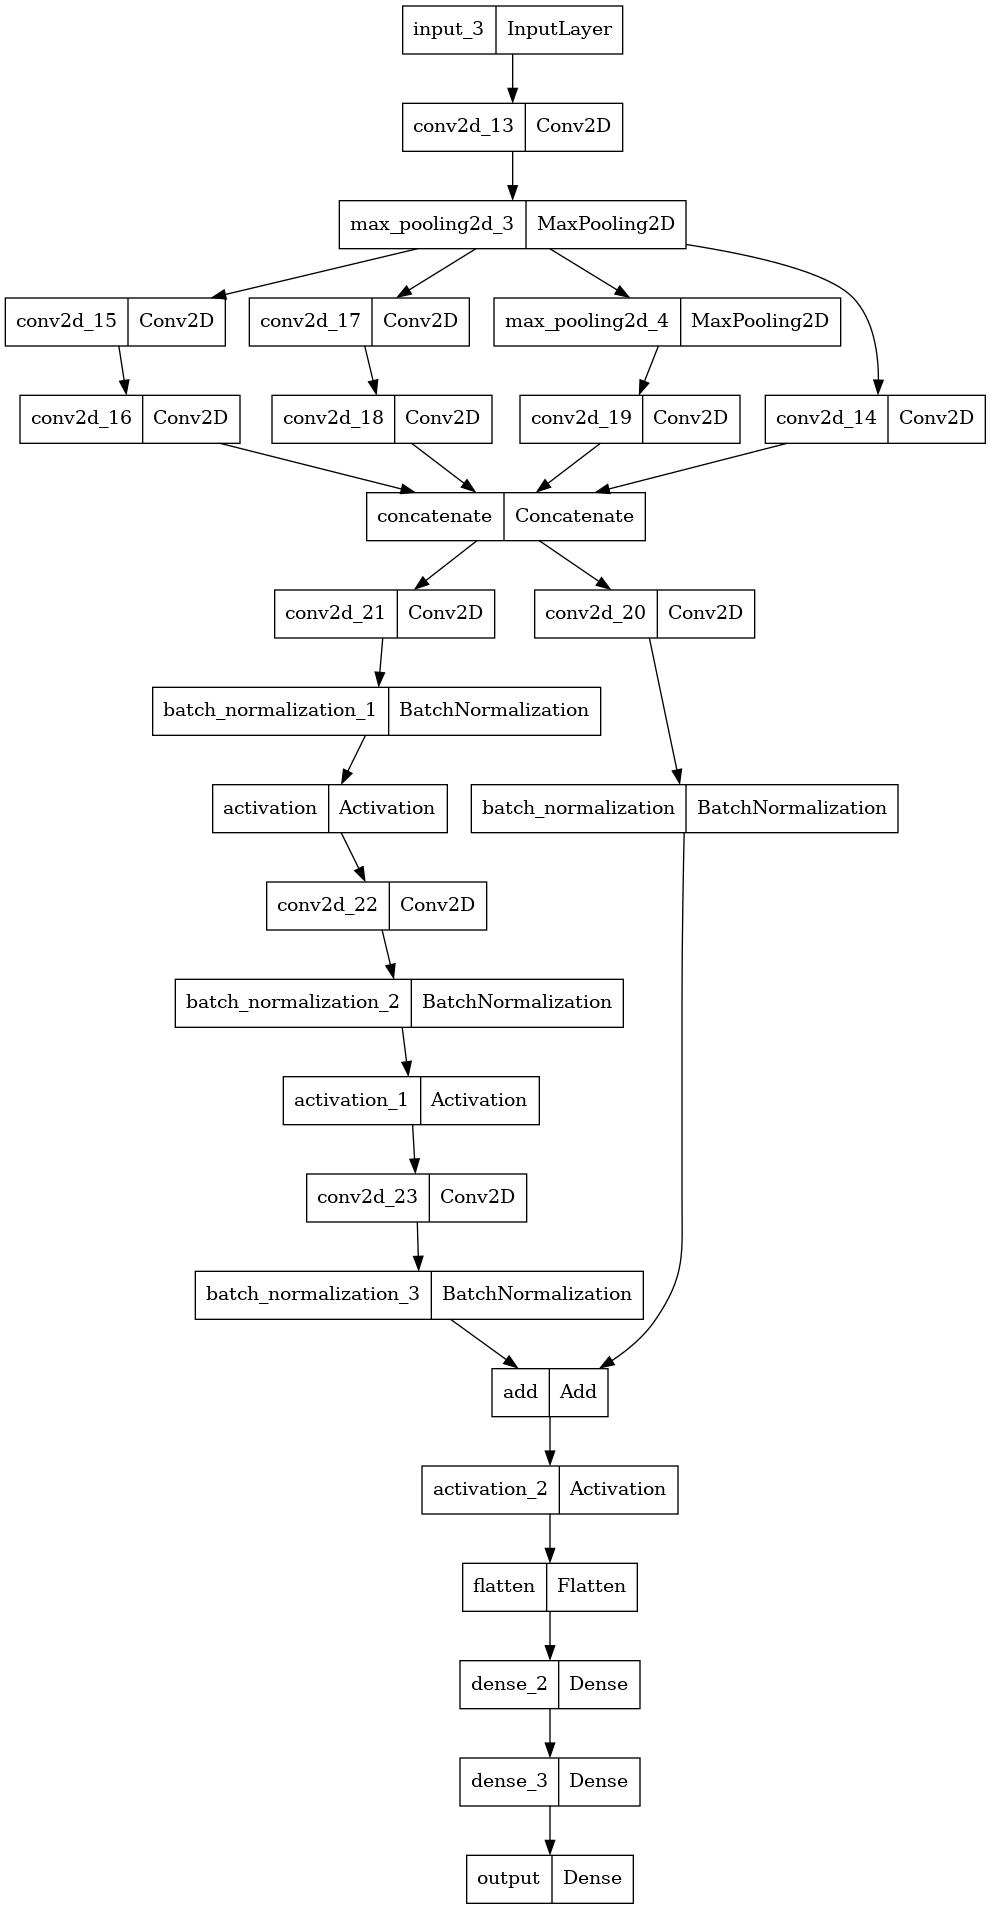

In [20]:
tf.keras.utils.plot_model(model2,to_file='model2.png')

In [21]:
input_layer = Input(shape = (227,227,3))
x = Conv2D(32,(7,7),strides=(1,1),padding='same', activation='relu')(input_layer)
x = MaxPooling2D((3,3), strides = (2,2), padding = 'same')(x)
x = residual_block(x,(3,3),[64,64,128],s=1)
x = residual_block(x,(3,3),[64,64,128],s=1)
x = inception_module(x,64,96,128,16,32,32)
x = inception_module(x,64,96,128,16,32,32)
x = Flatten()(x)
x = Dense(512,activation='relu')(x)
x = Dense(1024,activation='relu')(x)
output_layer = Dense(10,activation='softmax', name='output')(x)
    

In [22]:
model3 = Model(inputs=input_layer, outputs=output_layer)

In [23]:
model3.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_24 (Conv2D)             (None, 227, 227, 32  4736        ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_5 (MaxPooling2D)  (None, 114, 114, 32  0          ['conv2d_24[0][0]']              
                                )                                                           

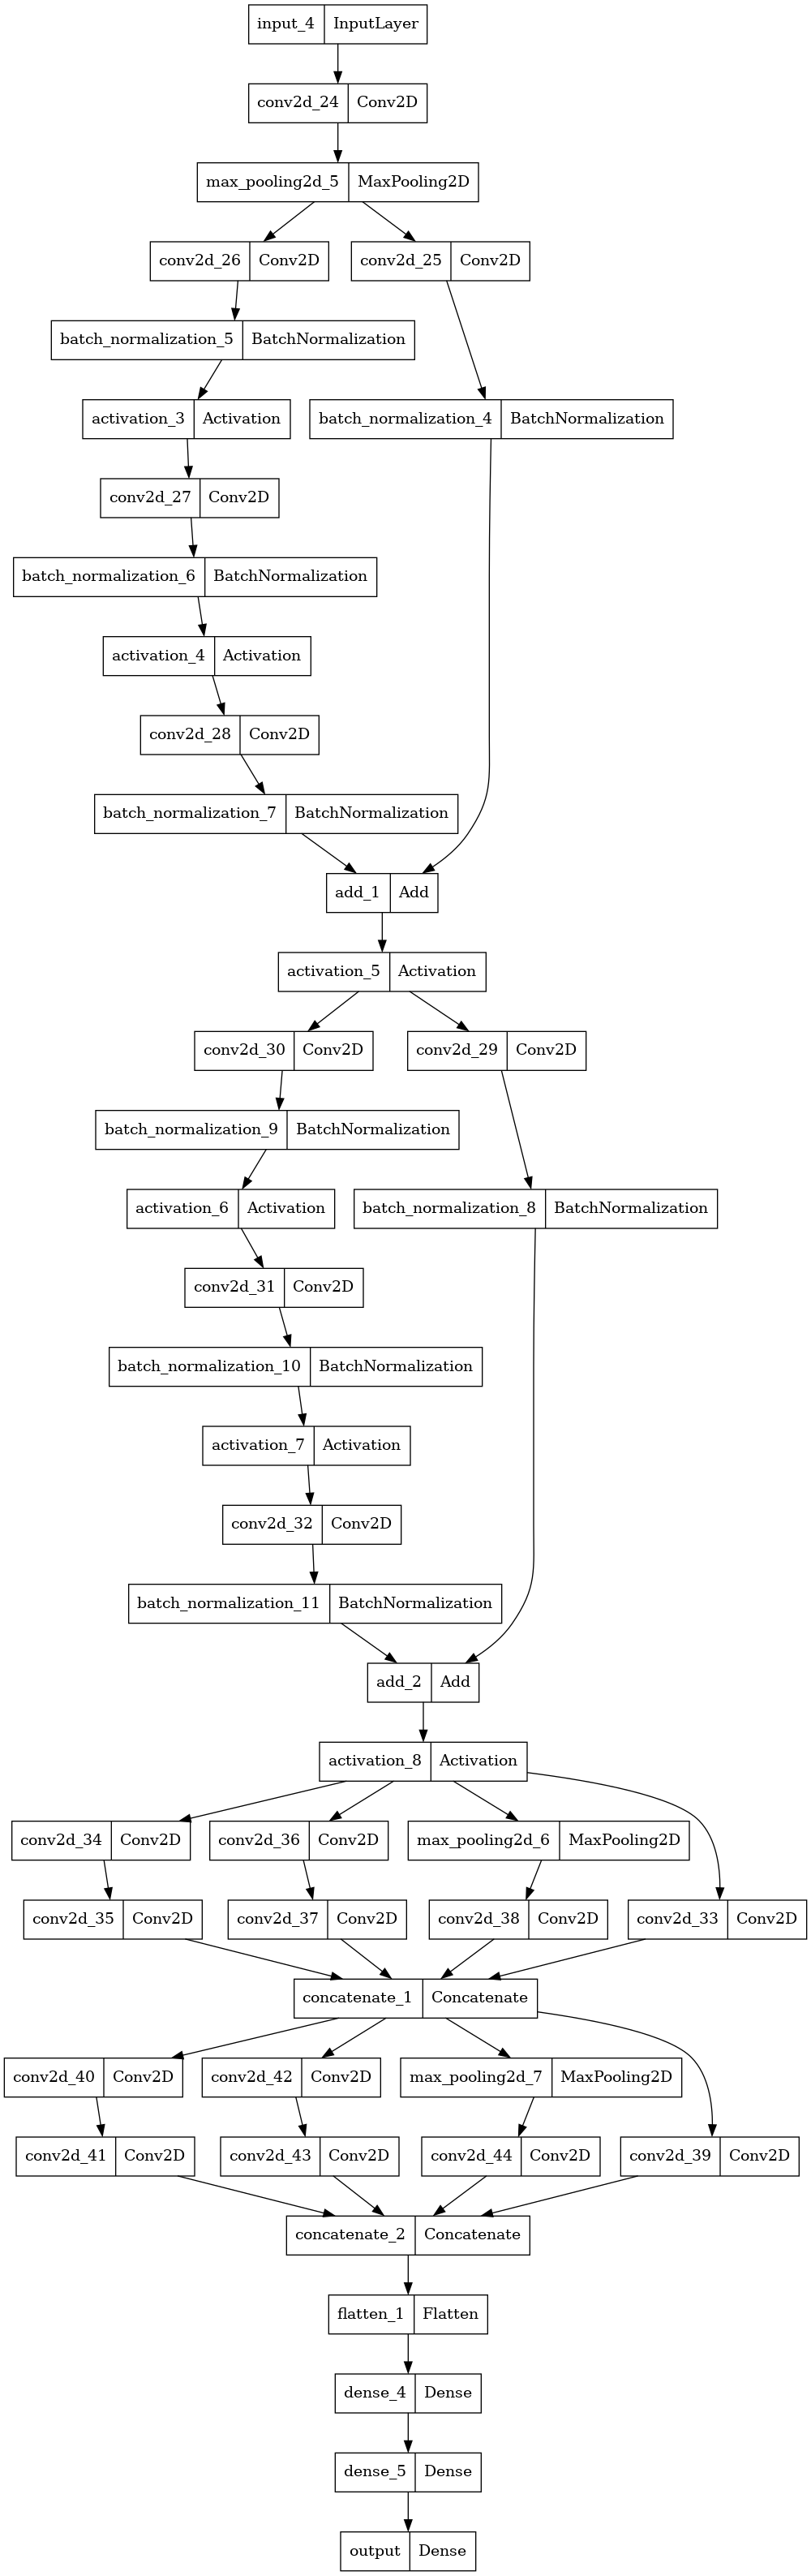

In [24]:
tf.keras.utils.plot_model(model3, to_file='model3.png')

In [25]:
input_layer=Input(shape=(227,227,3))
x = Conv2D(32,(3,3),strides=(2,2),padding='same', activation='relu')(input_layer)
x = BatchNormalization()(x)
x = mobilenet_block(x,3,64,1)
x = mobilenet_block(x,3,64,1)
x = inception_module(x,160,112,224,24,64,64)
x = inception_module(x,128,128,256,24,26,26)
aux_avg = GlobalAveragePooling2D()(x)
aux_drop = Dropout(0.4)(aux_avg)
aux_output = Dense(10, activation='softmax', name = 'aux_output')(aux_drop)
x = inception_module(x,256,160,320,32,128,128)
x = inception_module(x,384,192,384,48,128,128)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
output_layer = Dense(10, activation='softmax', name = 'output')(x)

In [26]:
model4 = Model(inputs=input_layer, outputs = output_layer)

In [27]:
model4.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_45 (Conv2D)             (None, 114, 114, 32  896         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_12 (BatchN  (None, 114, 114, 32  128        ['conv2d_45[0][0]']              
 ormalization)                  )                                                           

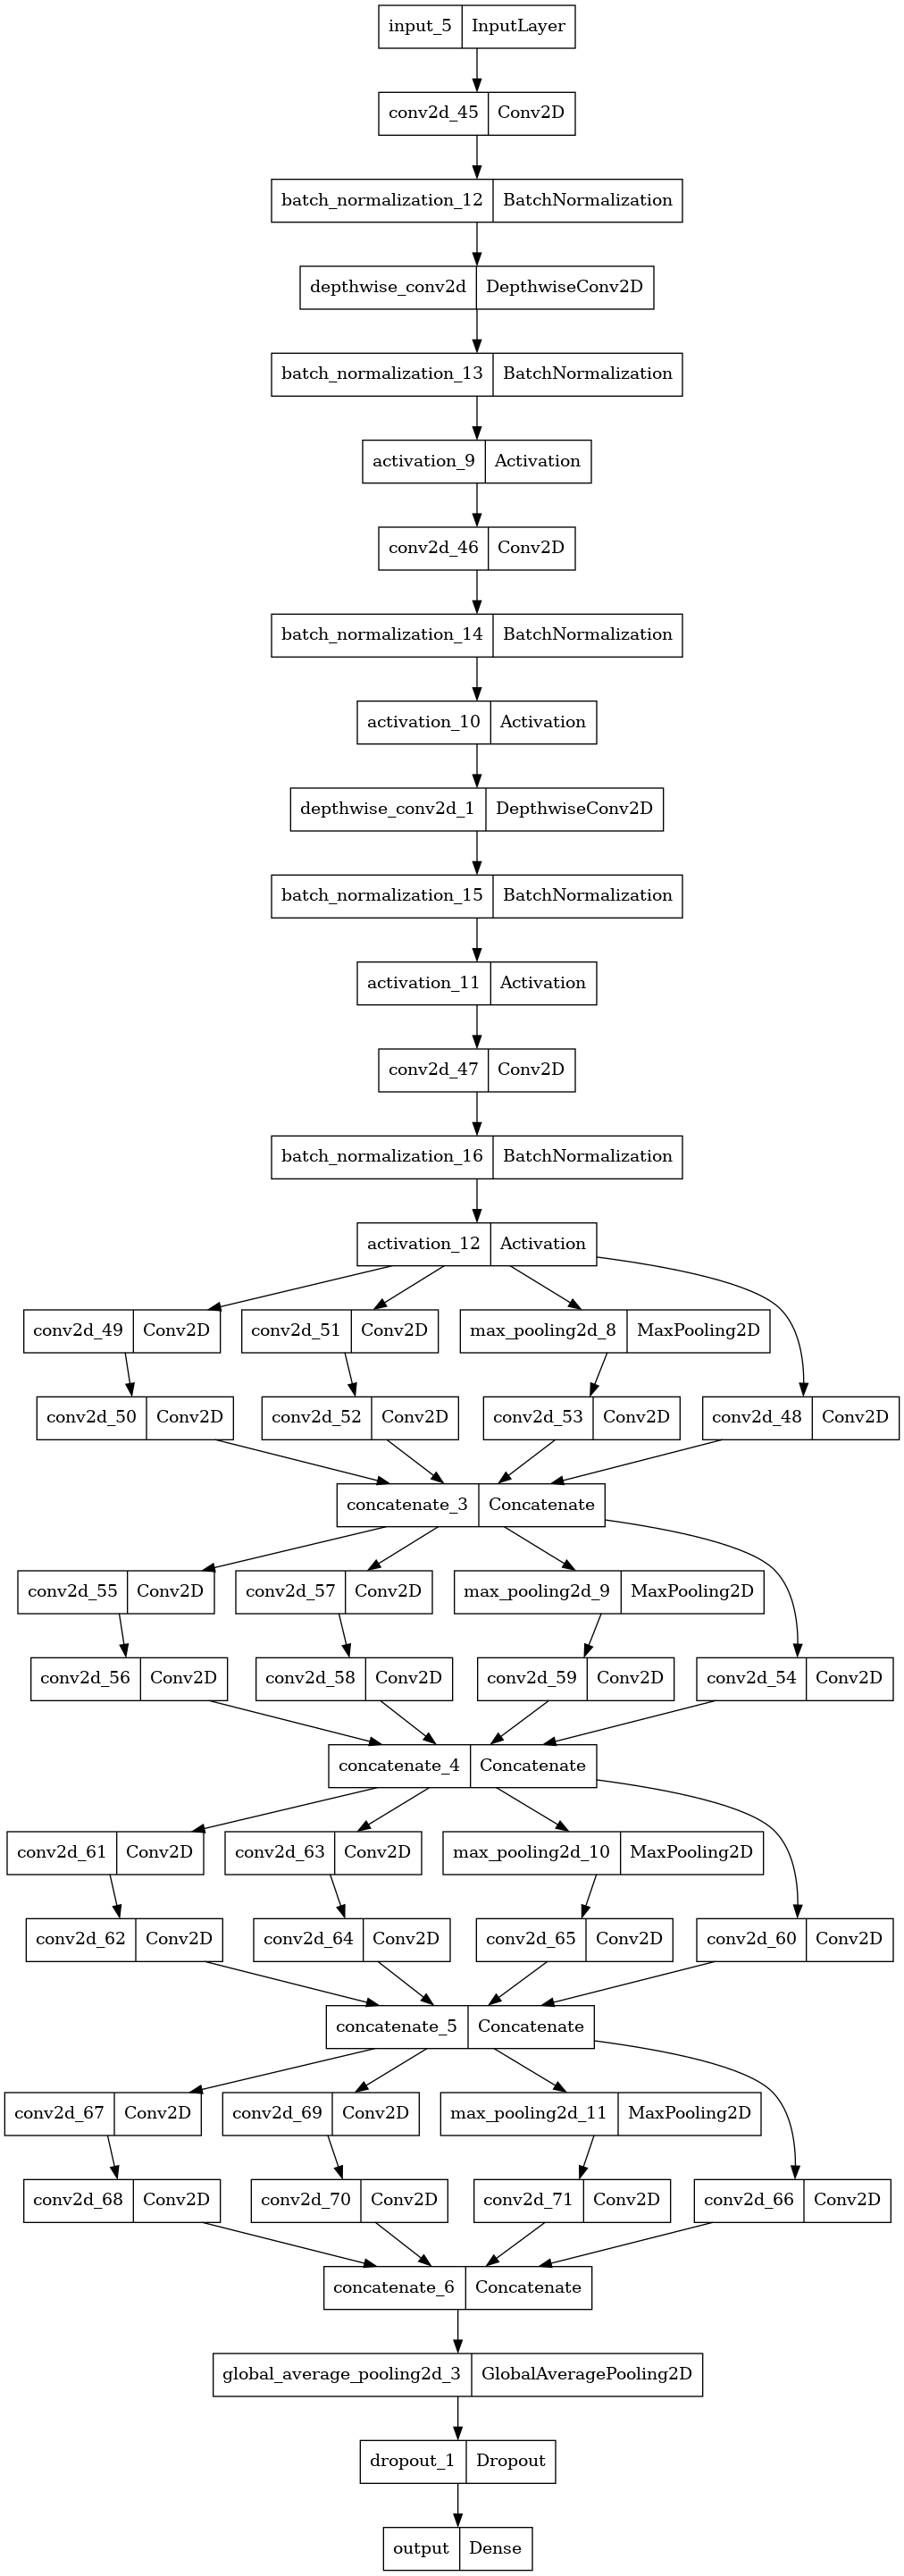

In [28]:
tf.keras.utils.plot_model(model4,to_file='model4.png')

****Visually similar search ****

In [29]:
import cv2
import numpy as np

# Load the reference image and compute its SIFT keypoints and descriptors
reference_image = cv2.imread('reference_image.jpg')
reference_gray = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
reference_kp, reference_des = sift.detectAndCompute(reference_gray, None)

# Load the query image and compute its SIFT keypoints and descriptors
query_image = cv2.imread('query_image.jpg')
query_gray = cv2.cvtColor(query_image, cv2.COLOR_BGR2GRAY)
query_kp, query_des = sift.detectAndCompute(query_gray, None)

# Match the SIFT descriptors between the reference and query images using a FLANN-based matcher
matcher = cv2.FlannBasedMatcher({'algorithm': 0, 'trees': 5}, {'checks': 50})
matches = matcher.knnMatch(reference_des, query_des, k=2)

# Apply the ratio test to remove ambiguous matches
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Draw the matched keypoints between the reference and query images
matched_image = cv2.drawMatches(reference_image, reference_kp, query_image, query_kp, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matched image
cv2.imshow('Matched Image', matched_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In this code, we first load the reference and query images using cv2.imread(), and convert them to grayscale using cv2.cvtColor(). We then use the SIFT feature detector and descriptor to compute the keypoints and descriptors for each image using cv2.SIFT_create() and sift.detectAndCompute().

Next, we match the SIFT descriptors between the reference and query images using a FLANN-based matcher. We apply the ratio test to remove ambiguous matches, where we only keep matches where the distance to the closest descriptor is less than 70% of the distance to the second-closest descriptor.

Finally, we draw the matched keypoints between the reference and query images using cv2.drawMatches(), and display the matched image using cv2.imshow(

**siasmese code**

In [30]:
import keras
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.models import Model
from keras import backend as K

# Define the input shape for the network
input_shape = (28, 28, 1)

# Define the left and right input tensors
left_input = Input(input_shape)
right_input = Input(input_shape)

# Define the shared convolutional layers of the network
convnet = Sequential()
convnet.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
convnet.add(MaxPooling2D())
convnet.add(Conv2D(64, (3,3), activation='relu'))
convnet.add(MaxPooling2D())
convnet.add(Conv2D(128, (3,3), activation='relu'))
convnet.add(MaxPooling2D())
convnet.add(Conv2D(256, (3,3), activation='relu'))

# Define the Siamese network architecture
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

# Define the distance metric used to compute the similarity between the encoded inputs
def euclidean_distance(vects):
    x, y = vects
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))

# Define the output layer of the network, which computes the distance between the encoded inputs
distance_layer = Lambda(euclidean_distance)([encoded_l, encoded_r])
output_layer = Dense(1, activation='sigmoid')(distance_layer)

# Define the Siamese network model
model = Model(inputs=[left_input, right_input], outputs=output_layer)

# Compile the model with a binary cross-entropy loss function and the Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on a dataset of image pairs and their corresponding similarity labels
model.fit([left_train, right_train], y_train, epochs=10, batch_size=32, validation_data=([left_val, right_val], y_val))


ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv2d_75. Consider increasing the input size. Received input shape [None, 1, 1, 128] which would produce output shape with a zero or negative value in a dimension.

n this code, we first define the input shape for the network and create left and right input tensors using keras.layers.Input(). We then define the shared convolutional layers of the network using keras.models.Sequential() and add convolutional and pooling layers to it.

Next, we define the Siamese network architecture by passing the left and right input tensors through the shared convolutional layers using convnet(left_input) and convnet(right_input), respectively. We then define the distance metric used to compute the similarity between the encoded inputs using euclidean_distance(), and apply it to the encoded inputs using Lambda(euclidean_distance)([encoded_l, encoded_r]).

Finally, we define the output layer of the network, which computes the distance between the encoded inputs, using Dense(1, activation='sigmoid')(distance_layer), and define the Siamese network model using keras.models.Model(). We compile the model with a binary cross-entropy loss function and the Adam optimizer using model.compile(), and train the model on a dataset of image pairs and their corresponding similarity labels using model.fit().







**Classification video code**    

In [31]:
import cv2
import numpy as np
from keras.models import load_model

# Define the classes for the classification task
classes = ['class1', 'class2', 'class3']

# Load the pre-trained Keras model
model = load_model('model.h5')

# Define the video capture object
cap = cv2.VideoCapture('video.mp4')

# Loop through the frames of the video
while True:
    # Read the next frame from the video
    ret, frame = cap.read()
    
    # Check if the frame was successfully read
    if not ret:
        break
    
    # Preprocess the frame for input to the model
    frame = cv2.resize(frame, (224, 224))
    frame = np.expand_dims(frame, axis=0)
    
    # Use the model to classify the frame
    prediction = model.predict(frame)[0]
    class_index = np.argmax(prediction)
    class_label = classes[class_index]
    
    # Draw the class label on the frame
    cv2.putText(frame, class_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    
    # Show the frame with the class label
    cv2.imshow('frame', frame)
    
    # Wait for a key press to exit the program
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()


OSError: No file or directory found at model.h5

In this code, we first define the classes for the classification task using a list of strings. We then load the pre-trained Keras model using keras.models.load_model().

We define the video capture object using cv2.VideoCapture(), and loop through the frames of the video using a while loop. For each frame, we preprocess it for input to the model by resizing it to 224x224 pixels and adding an extra dimension using cv2.resize() and numpy.expand_dims(), respectively.

We use the model to classify the frame by passing it through the model using model.predict(), and extract the predicted class index and label using numpy.argmax() and the classes list, respectively.

We draw the class label on the frame using cv2.putText(), and show the frame with the class label using cv2.imshow(). We wait for a key press to exit the program using cv2.waitKey(), and release the video capture object and close all windows using cap.release() and cv2.destroyAllWindows(), respectively.

****Bounding Box ****

In [32]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Generate some dummy data for training
X_train = np.random.rand(1000, 4)
y_train = np.random.rand(1000, 4)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=4))
model.add(Dense(64, activation='relu'))
model.add(Dense(4))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Generate some dummy data for testing
X_test = np.random.rand(10, 4)

# Use the model to make predictions on the test data
y_pred = model.predict(X_test)

# Print the predicted bounding boxes
print(y_pred)


Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 0.1645
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.0963
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.0922
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.0907
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.0885
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.0877
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.0867
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.0860
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.0857
Epoch 10/10
1/1 [==============================] - 0s 98ms/step
[[0.56816626 0.56950766 0.5324388  0.5662565 ]
 [0.4782647  0.4765044  0.4479638  0.43491533]
 [0.5448278  0.51170677 0.48035532 0.481329  ]
 [0.43233427 0.43879426 0.43156195 0.4643812 ]
 [0.5095101  0.5249232  0.5012938  0.

In this code, we first generate some dummy data for training and testing using numpy.random.rand(). We define the model architecture using keras.Sequential() and add two fully connected layers using keras.layers.Dense(), with a ReLU activation function for the hidden layers and no activation function for the output layer.

We compile the model using model.compile() with the Adam optimizer and mean squared error (MSE) loss function. We then train the model using model.fit() on the training data.

We generate some additional dummy data for testing, and use the trained model to make predictions on the test data using model.predict(). We print the predicted bounding boxes for the test data using print()